# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
2. Answer those questions through a mix of statistical tests and visualizations.

* Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

* Target = logerror

1. Location: is logerror significantly different for properties in LA County vs Orange County vs Ventura County
2. Size: is logerror significantly different between larger and smaller properties
3. Age: is the age of a home a driver for logerror
4. Bedroom/Bathrooms: is logerror affected by the number of bed'rs/bath'rs
5. Swimming/Pools/Garages: is logerror impacted by these features of a home

In [1]:
import warnings
warnings.filterwarnings('ignore')
from wrangle import summarize

# modules we'll use
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score


import scipy.stats as stats

from sklearn.feature_selection import SelectKBest, RFE, f_regression

import os
import missingno as msno

#Access Stored Data
from env import host,db,protocol,password,user,mysqlcon
import wrangle
import env

In [2]:
df = wrangle.get_zillow()

In [3]:
df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathrooms,bedrooms,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,trans_date,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,prop_landuse_desc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
dd = pd.read_excel('zillow_data_dictionary.xlsx')

In [5]:
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [6]:
summary = wrangle.summarize(df)

SUMMARY REPORT


Dataframe head: 
   Unnamed: 0       id  parcelid  airconditioningtypeid  \
0           0  1727539  14297519                    NaN   
1           1  1387261  17052889                    NaN   
2           2    11677  14186244                    NaN   

   architecturalstyletypeid  basementsqft  bathrooms  bedrooms  \
0                       NaN           NaN        3.5       4.0   
1                       NaN           NaN        1.0       2.0   
2                       NaN           NaN        2.0       3.0   

   buildingclasstypeid  buildingqualitytypeid  ...  censustractandblock  \
0                  NaN                    NaN  ...         6.059063e+13   
1                  NaN                    NaN  ...         6.111001e+13   
2                  NaN                    NaN  ...         6.059022e+13   

   logerror  trans_date  airconditioningdesc  architecturalstyledesc  \
0  0.025595  2017-01-01                  NaN                     NaN   
1  0.055619  2017-0

(106.198, 2308.1]     59592
(2308.1, 4488.2]      12862
(4488.2, 6668.3]       1069
(6668.3, 8848.4]        161
(8848.4, 11028.5]        45
(11028.5, 13208.6]       12
(13208.6, 15388.7]        2
(15388.7, 17568.8]        2
(17568.8, 19748.9]        1
(19748.9, 21929.0]        2
Name: finishedsquarefeet12, dtype: int64 

(1055.4950000000001, 1106.4]     2
(1106.4, 1156.8]                 2
(1156.8, 1207.2]                 1
(1207.2, 1257.6]                 2
(1257.6, 1308.0]                 1
(1308.0, 1358.4]                 5
(1358.4, 1408.8]                 2
(1408.8, 1459.2]                18
(1459.2, 1509.6]                 3
(1509.6, 1560.0]                 5
Name: finishedsquarefeet13, dtype: int64 

(562.957, 4102.2]     2811
(4102.2, 7606.4]       193
(7606.4, 11110.6]        3
(11110.6, 14614.8]       0
(14614.8, 18119.0]       0
(18119.0, 21623.2]       1
(21623.2, 25127.4]       0
(25127.4, 28631.6]       0
(28631.6, 32135.8]       0
(32135.8, 35640.0]       1
Name: finished

                      num_rows_missing  percent_rows_missing
buildingclasstypeid              77365             99.980615
buildingclassdesc                77365             99.980615
finishedsquarefeet13             77339             99.947015
storytypeid                      77330             99.935384
storydesc                        77330             99.935384
...                                ...                   ...
fips                                 0              0.000000
bedrooms                             0              0.000000
bathrooms                            0              0.000000
parcelid                             0              0.000000
county_landuse_code                  0              0.000000

[69 rows x 2 columns]
nulls in dataframe by row: 
       num_cols_missing  percent_cols_missing
55461                48             69.565217
41501                48             69.565217
13386                48             69.565217
16553                47          

In [7]:
null_rows = wrangle.nulls_by_row(df)
null_rows

,num_cols_missing,percent_cols_missing
55461,48,69.565217
41501,48,69.565217
13386,48,69.565217
16553,47,68.115942
61092,47,68.115942
...,...,...
4881,24,34.782609
67756,24,34.782609
15477,24,34.782609
32747,23,33.333333


In [8]:
null_cols = wrangle.nulls_by_col(df)
null_cols

,num_rows_missing,percent_rows_missing
buildingclasstypeid,77365,99.980615
buildingclassdesc,77365,99.980615
finishedsquarefeet13,77339,99.947015
storytypeid,77330,99.935384
storydesc,77330,99.935384
...,...,...
fips,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
parcelid,0,0.000000


In [9]:
df.describe()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathrooms,bedrooms,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structure_taxvalue,tax_value,assessmentyear,landtaxvaluedollarcnt,tax_amount,taxdelinquencyyear,censustractandblock,logerror
count,77380.000000,7.738000e+04,7.738000e+04,24953.000000,206.000000,50.000000,77380.000000,77380.000000,15.000000,49671.000000,...,17560.000000,172.0,7.726800e+04,7.737900e+04,77380.0,7.737800e+04,77375.000000,2886.000000,7.713600e+04,77380.000000
mean,38689.500000,1.495126e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299134,3.053489,3.933333,6.534638,...,1.434738,1.0,1.893160e+05,4.901375e+05,2016.0,3.010969e+05,5995.566592,14.087318,6.049674e+13,0.016628
std,22337.826252,8.609057e+05,3.481368e+06,2.967894,2.734542,689.703546,0.996657,1.139103,0.258199,1.721933,...,0.544569,0.0,2.300886e+05,6.534477e+05,0.0,4.925990e+05,7622.887460,2.185663,1.535252e+12,0.170190
min,0.000000,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,19344.750000,7.520500e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.585000,14.000000,6.037311e+13,-0.024377
50%,38689.500000,1.497870e+06,1.253155e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,...,1.000000,1.0,1.364995e+05,3.589760e+05,2016.0,2.033835e+05,4450.720000,15.000000,6.037603e+13,0.006627
75%,58034.250000,2.240480e+06,1.421184e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,...,2.000000,1.0,2.187875e+05,5.690030e+05,2016.0,3.668022e+05,6927.800000,15.000000,6.059042e+13,0.039204
max,77379.000000,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [10]:
df.shape

(77380, 69)

In [11]:
df = wrangle.handle_missing_values(df, prop_required_columns=0.6, prop_required_rows=0.75)

In [12]:
summary = summarize(df)

SUMMARY REPORT


Dataframe head: 
   Unnamed: 0       id  parcelid  bathrooms  bedrooms  buildingqualitytypeid  \
0           0  1727539  14297519        3.5       4.0                    NaN   
1           1  1387261  17052889        1.0       2.0                    NaN   
2           2    11677  14186244        2.0       3.0                    NaN   

   calculatedbathnbr    area  finishedsquarefeet12    fips  ...  \
0                3.5  3100.0                3100.0  6059.0  ...   
1                1.0  1465.0                1465.0  6111.0  ...   
2                2.0  1243.0                1243.0  6059.0  ...   

   structure_taxvalue  tax_value  assessmentyear  landtaxvaluedollarcnt  \
0            485713.0  1023282.0          2016.0               537569.0   
1             88000.0   464000.0          2016.0               376000.0   
2             85289.0   564778.0          2016.0               479489.0   

   tax_amount censustractandblock  logerror  trans_date  heatingorsystemdes

(-4.666, -3.664]        3
(-3.664, -2.672]        1
(-2.672, -1.68]        36
(-1.68, -0.688]       140
(-0.688, 0.304]     75204
(0.304, 1.296]       1669
(1.296, 2.287]        100
(2.287, 3.279]         70
(3.279, 4.271]          1
(4.271, 5.263]          1
Name: logerror, dtype: int64 

2017-06-30    1187
2017-04-28     911
2017-05-31     866
2017-07-28     812
2017-08-31     781
              ... 
2017-03-12       1
2017-07-22       1
2017-08-05       1
2017-08-06       1
2017-09-25       1
Name: trans_date, Length: 264, dtype: int64 

Central       33550
Floor/Wall    14064
Yes             846
Forced air      776
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64 

Single Family Residential                     52255
Condominium                                   19236
Duplex (2 Units, Any Combination)              2008
Planned Unit Development                       1942
Quad

In [13]:
wrangle.remaining_missing(df)

Index(['buildingqualitytypeid', 'calculatedbathnbr', 'area',
       'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid',
       'lotsizesquarefeet', 'zoning_desc', 'regionidcity', 'regionidzip',
       'unitcnt', 'year_built', 'structure_taxvalue', 'tax_value',
       'landtaxvaluedollarcnt', 'tax_amount', 'censustractandblock',
       'heatingorsystemdesc'],
      dtype='object')

In [14]:
numeric_cols = wrangle.get_numerics(df)
numeric_cols.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'bathrooms', 'bedrooms',
       'buildingqualitytypeid', 'calculatedbathnbr', 'area',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'year_built', 'structure_taxvalue',
       'tax_value', 'assessmentyear', 'landtaxvaluedollarcnt', 'tax_amount',
       'censustractandblock', 'logerror'],
      dtype='object')

In [15]:
cat_cols = wrangle.get_categorical(df)
cat_cols

,county_landuse_code,zoning_desc,trans_date,heatingorsystemdesc,prop_landuse_desc
0,122,NaN,2017-01-01,NaN,Single Family Residential
1,1110,NaN,2017-01-01,NaN,Single Family Residential
2,122,NaN,2017-01-01,NaN,Single Family Residential
3,0101,LCR110000*,2017-01-01,Central,Single Family Residential
4,010C,LAR3,2017-01-01,Central,Condominium
...,...,...,...,...,...
77375,010C,LARD3,2017-09-20,Central,Condominium
77376,0100,LARE40,2017-09-20,Central,Single Family Residential
77377,1111,NaN,2017-09-21,NaN,Single Family Residential
77378,0100,SER1*,2017-09-21,Central,Single Family Residential


In [16]:
df = wrangle.impute_remaining(df)

In [17]:
df.isna().sum()

Unnamed: 0                    0
id                            0
parcelid                      0
bathrooms                     0
bedrooms                      0
buildingqualitytypeid         0
calculatedbathnbr             0
area                          0
finishedsquarefeet12          0
fips                          0
fullbathcnt                   0
heatingorsystemtypeid         0
latitude                      0
longitude                     0
lotsizesquarefeet             0
county_landuse_code           0
propertylandusetypeid         0
zoning_desc               26930
rawcensustractandblock        0
regionidcity                  0
regionidcounty                0
regionidzip                   0
roomcnt                       0
unitcnt                       0
year_built                    0
structure_taxvalue            0
tax_value                     0
assessmentyear                0
landtaxvaluedollarcnt         0
tax_amount                    0
censustractandblock           0
logerror

In [18]:
df.heatingorsystemdesc.value_counts()

Central       33550
Floor/Wall    14064
Yes             846
Forced air      776
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [19]:
#df = wrangle.pepare_zillow(df)

<AxesSubplot:xlabel='fullbathcnt', ylabel='Count'>

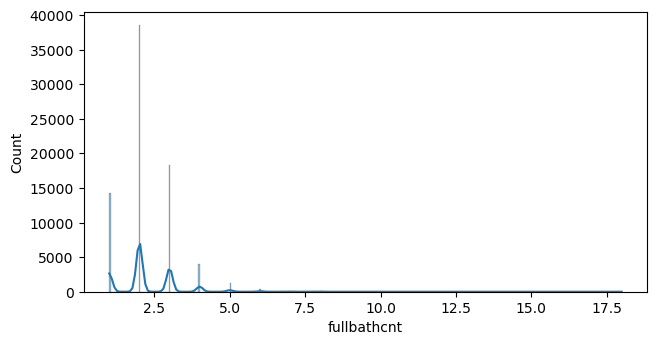

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['fullbathcnt'], kde=True)

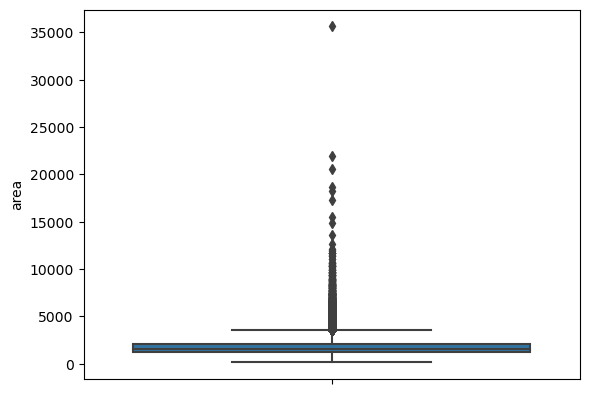

In [21]:
sns.boxplot( y=df["area"] );
plt.show()

from sklearn.model_selection import train_test_split

# Create test dataset

train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        )
# Create train and validate datsets

train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123, 
                                   )

# Take a look at your split datasets

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

x_train = train
x_validate = validate
x_test = test

y_train = x_train['logerror']
y_validate = x_validate['logerror']
y_test = x_test['logerror']

x_train = x_train.drop(columns='logerror')
x_validate = x_validate.drop(columns='logerror')
x_test = x_test.drop(columns='logerror')

numeric_cols = wrangle.get_numerics(df)
numeric_cols

scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')
plt.show()